## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.

respondant ID
year
realinc
hrs2
martial
sphrs2
happy

trustsci
polviews
educ

2. Write a short description of the data you chose, and why. (1 page)

The year variable records when the individual filled out the GSS survey. Realinc variable records how much an inidivudal makes when prompted what their family income is in constant dollars. The hrs2  variable is the number of hours the individual usually works a week, while sphrs2 is the number of hours the individual's spouse usually works a week. Marital records whether the individual is married, widowed, divorced, separated, or have never been married before. The happy variable records general happiness level when prompted "taken all together, how would you say things are these days--would you say that you are very happy, pretty happy, or not too happy?" I was curious to see if an individual's self-evaluated happiness is correlated to their relative income. I suspect that those that make more on average would be happier. Furthermore I wanted to see if how many hours an individual works weekly is also correlated to happiness with those working less to be happier. I suspect a similar trend with how many hours their spouse works weekly.

The trustsci variable records whether the individual agrees or disagress with the following prompt: Trust too much in science and not enough in religious faith. Polviews records how the individual self identifies politically when prompted: "Hear a lot of talk these days about liberals and conservatives. I'm going to show you a seven-point scale on which the political views that people might hold are arranged from extremely liberal--point 1--to extremely conservative--point 7. Where would you place yourself on this scale?" Lastly educ records the highest year of school completed. With the recent election and current events, I wanted to see if education level and political affilation had a relationship with whether the individual trusts in science. Additionally, I wanted to see the correlation between political affilation and education level because of the trends seen in voter demographic from the 2024 election.

3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.

People who said they were "Very happy" have a higher family income on average compared to those who said they were "Pretty happy" and "Not too happy"

Interestingly, those who said they were "Very happy" work more hours per week on average than those who weren't as happy. In regard to how many hours their spouse works, there appears to be no difference across the various happiness levels.

Political affiliation and education level appear to have no correlation with whether or not the individual agrees that society trusts science too much.

Political affialation and education appear to have minimal correlation. However, moderate individuals appear to have a high correlation with higher education.

6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/ashleynguyen04/EDA/refs/heads/main/lab/GSS.csv")

df.head()

,year,id_,hrs2,marital,sphrs2,educ,polviews,happy,trustsci,realinc
0,1972,1,.i: Inapplicable,Never married,.i: Inapplicable,4 years of college,.i: Inapplicable,Not too happy,.i: Inapplicable,18951.0
1,1972,2,.i: Inapplicable,Married,.i: Inapplicable,10th grade,.i: Inapplicable,Not too happy,.i: Inapplicable,24366.0
2,1972,3,.i: Inapplicable,Married,.i: Inapplicable,12th grade,.i: Inapplicable,Pretty happy,.i: Inapplicable,24366.0
3,1972,4,.i: Inapplicable,Married,.i: Inapplicable,5 years of college,.i: Inapplicable,Not too happy,.i: Inapplicable,30458.0
4,1972,5,.i: Inapplicable,Married,.i: Inapplicable,12th grade,.i: Inapplicable,Pretty happy,.i: Inapplicable,50763.0


In [14]:
#Cleaning numeric variables
df['hrs2'] = pd.to_numeric(df['hrs2'], errors='coerce') #change values to floats, and replace non-numbers w/ nan
print(df['hrs2'].unique())
df['sphrs2'] = pd.to_numeric(df['sphrs2'], errors='coerce')
print(df['sphrs2'].unique())

#print(df['realinc'].unique())

[nan 40. 55. 15. 56. 50. 10. 35. 70. 16. 37. 30. 48. 20.  5. 25. 60. 32.
 52. 45. 75. 24.  4. 44. 34. 13.  8. 12.  6. 80. 39. 21. 47. 36. 38. 33.
 46. 42. 43. 11. 66. 23.  7. 58. 18. 65. 84. 17. 68. 41.  1.  2.  0. 72.
 28. 57.  3. 22. 27. 26.  9.]
[nan 73. 20. 40. 35. 48. 14. 50. 16. 84. 44. 56. 13. 32.  8. 37. 72. 24.
 12. 60. 54. 22. 43. 25. 38. 49. 30. 45. 36. 65. 57. 55. 52. 70. 51. 21.
 26. 10.  5. 46. 80. 47.  1. 42. 39. 33. 27. 18. 15. 34.  9.]


In [15]:
#Cleaning categorical variables

#marital
valid_marital = ['Never married', 'Married', 'Divorced', 'Widowed', 'Separated']
df['marital'] = df['marital'].apply(lambda x: x if x in valid_marital else 'Unknown') #replace invalid marital values (.n, .s, .d) with 'Unknown'
print(df['marital'].value_counts(),'\n')

#happy
valid_happy = ['Pretty happy', 'Very happy', 'Not too happy']
df['happy'] = df['happy'].apply(lambda x: x if x in valid_happy else 'Unknown') #replace invalid happpy values (.n, .d, .i, .s) with 'Unknown'
print(df['happy'].value_counts(),'\n')

#educ
#print(df['educ'].value_counts())
df['educ'] = df['educ'].replace({
    # Replace high school categories
    '12th grade': 'High school graduate',
    '11th grade': 'High school graduate',
    '10th grade': 'High school graduate',
    '9th grade': 'High school graduate',
    '8th grade': 'No high school diploma',
    '7th grade': 'No high school diploma',
    '6th grade': 'No high school diploma',
    '5th grade': 'No high school diploma',
    '4th grade': 'No high school diploma',
    '3rd grade': 'No high school diploma',
    '2nd grade': 'No high school diploma',
    '1st grade': 'No high school diploma',
    'No formal schooling': 'No high school diploma',

    # Replace college categories
    '4 years of college': 'Bachelor\'s degree',
    '3 years of college': 'Some college',
    '2 years of college': 'Some college',
    '1 year of college': 'Some college',
    '6 years of college': 'Master\'s degree',
    '5 years of college': 'Master\'s degree',
    '7 years of college': 'Doctorate degree',
    '8 or more years of college': 'Doctorate degree',
})

valid_educ = ['High school graduate','No high school diploma','Bachelor\'s degree','Some college','Master\'s degree','Doctorate degree']
df['educ'] = df['educ'].apply(lambda x: x if x in valid_educ else 'Unknown') #replace invalid educ values (.n,.d) with 'Unknown'
print(df['educ'].value_counts(),'\n')

#polviews
valid_polviews = ['Moderate, middle of the road','Slightly conservative','Conservative','Extremely conservative','Slightly liberal','Liberal','Extremely liberal']
df['polviews'] = df['polviews'].apply(lambda x: x if x in valid_polviews else 'Unknown') #replace invalid polviews values (.i, .d, .n, .s) with 'Unknown'
print(df['polviews'].value_counts(),'\n')

#trustsci
valid_trustsci = ['NOT AGREE/DSAGRE','DISAGREE','AGREE','STRONG DISAGREE','STRONGLY AGREE']
df['trustsci'] = df['trustsci'].apply(lambda x: x if x in valid_trustsci else 'Unknown') #replace invalid polviews values (.i, .y, .d, .n) with 'Unknown'
print(df['trustsci'].value_counts(),'\n')

marital
Married          37596
Never married    15904
Divorced          9642
Widowed           6756
Separated         2441
Unknown             51
Name: count, dtype: int64 

happy
Pretty happy     37813
Very happy       20385
Not too happy     9390
Unknown           4802
Name: count, dtype: int64 

educ
High school graduate      30525
Some college              17420
Bachelor's degree          9994
No high school diploma     5936
Master's degree            5337
Doctorate degree           2915
Unknown                     263
Name: count, dtype: int64 

polviews
Moderate, middle of the road    23992
Unknown                          9672
Slightly conservative            9596
Conservative                     9361
Slightly liberal                 7900
Liberal                          7623
Extremely conservative           2165
Extremely liberal                2081
Name: count, dtype: int64 

trustsci
Unknown             68706
NOT AGREE/DSAGRE     1029
DISAGREE              974
AGREE          

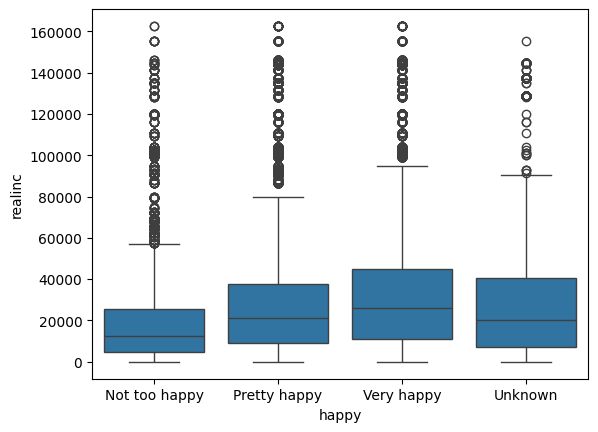

                 count          mean           std    min        25%  \
happy                                                                  
Not too happy   9390.0  19215.913972  22893.471255 -100.0   4905.000   
Pretty happy   37813.0  28602.718874  29132.458620 -100.0   8868.750   
Unknown         4802.0  30592.016237  34879.189565 -100.0   7039.125   
Very happy     20385.0  34274.885185  33048.254075 -100.0  11233.750   

                    50%      75%          max  
happy                                          
Not too happy  12520.00  25740.0  162607.0000  
Pretty happy   21318.75  37500.0  162607.0000  
Unknown        20335.25  40756.5  155139.9731  
Very happy     26015.00  45000.0  162607.0000  


In [16]:
sns.boxplot(data=df, x="happy", y="realinc", order=["Not too happy", "Pretty happy", "Very happy","Unknown"])
plt.show()
print(df.groupby('happy')['realinc'].describe())

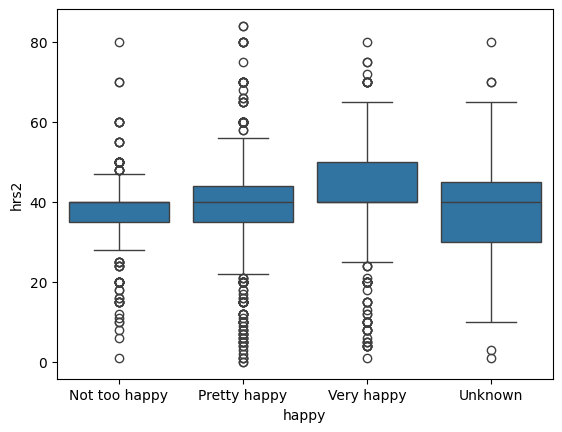

               count       mean        std  min   25%   50%   75%   max
happy                                                                  
Not too happy  213.0  37.774648  11.443706  1.0  35.0  40.0  40.0  80.0
Pretty happy   724.0  38.917127  13.163985  0.0  35.0  40.0  44.0  84.0
Unknown        103.0  38.135922  14.862803  1.0  30.0  40.0  45.0  80.0
Very happy     357.0  40.397759  14.061015  1.0  40.0  40.0  50.0  80.0


In [17]:
sns.boxplot(data=df, x="happy", y="hrs2", order=["Not too happy", "Pretty happy", "Very happy","Unknown"])
plt.show()
print(df.groupby('happy')['hrs2'].describe())

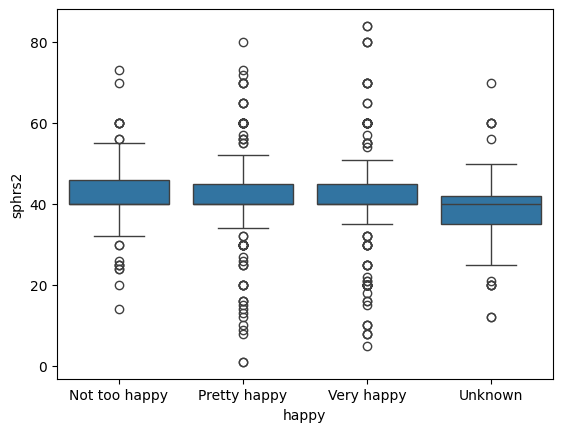

               count       mean        std   min   25%   50%   75%   max
happy                                                                   
Not too happy   57.0  41.701754  11.792802  14.0  40.0  40.0  46.0  73.0
Pretty happy   315.0  41.711111  10.899178   1.0  40.0  40.0  45.0  80.0
Unknown         45.0  38.911111  12.663157  12.0  35.0  40.0  42.0  70.0
Very happy     256.0  41.089844  12.741923   5.0  40.0  40.0  45.0  84.0


In [18]:
sns.boxplot(data=df, x="happy", y="sphrs2", order=["Not too happy", "Pretty happy", "Very happy","Unknown"])
plt.show()
print(df.groupby('happy')['sphrs2'].describe())

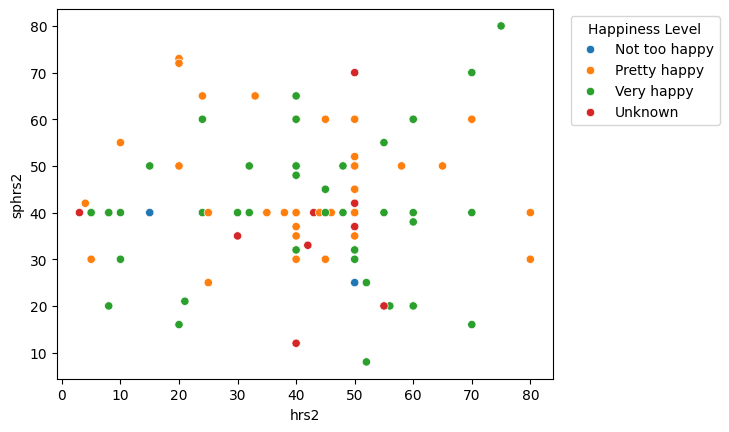

In [19]:
sns.scatterplot(data=df, x="hrs2", y="sphrs2", hue="happy")
plt.legend(title="Happiness Level", loc="upper right", bbox_to_anchor=(1.35, 1))
plt.show()

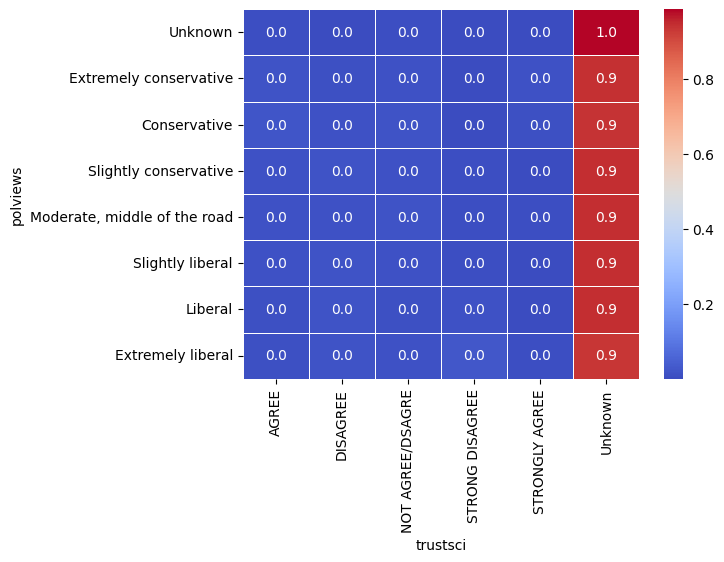

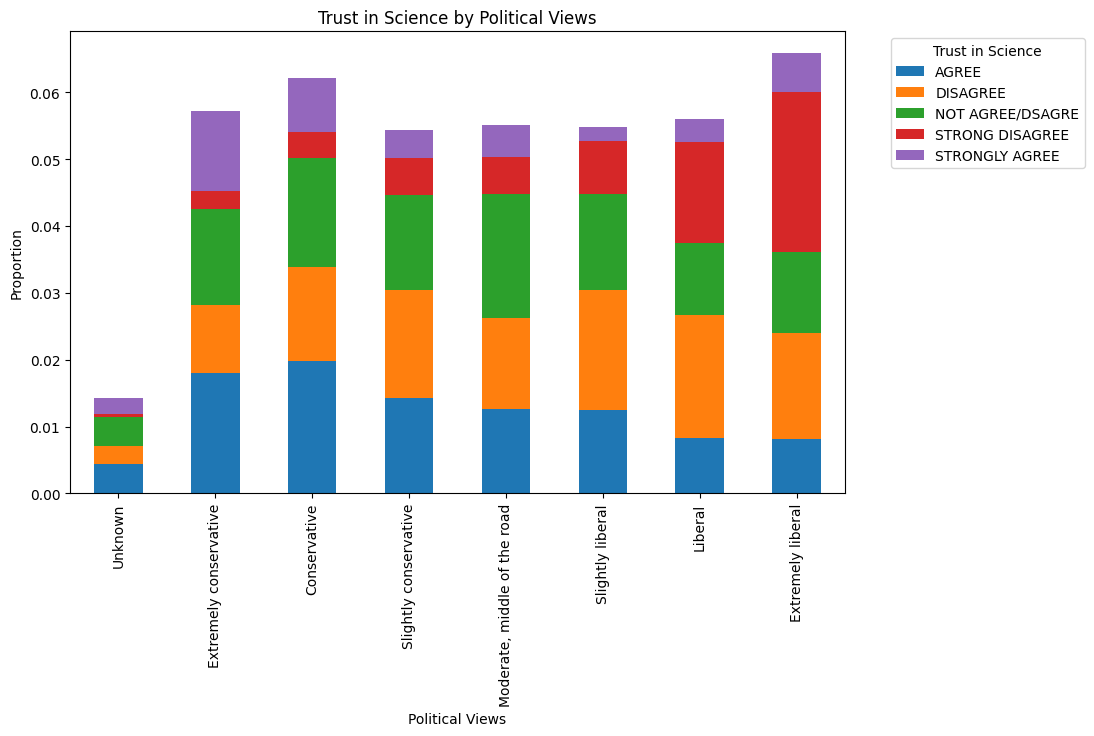

In [49]:
#polviews vs trust in science
cross_tab1 = pd.crosstab(df['polviews'], df['trustsci'], normalize='index')
polviews_order = ['Unknown','Extremely conservative','Conservative','Slightly conservative','Moderate, middle of the road','Slightly liberal','Liberal','Extremely liberal']
cross_tab1 = cross_tab1.reindex(polviews_order)
sns.heatmap(cross_tab1, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
if 'Unknown' in cross_tab1.columns: #remove unknowns from columns b/c was making graph disproportionate
  cross_tab1 = cross_tab1.drop(columns=['Unknown'])
cross_tab1.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Trust in Science by Political Views")
plt.xlabel("Political Views")
plt.ylabel("Proportion")
plt.legend(title="Trust in Science", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

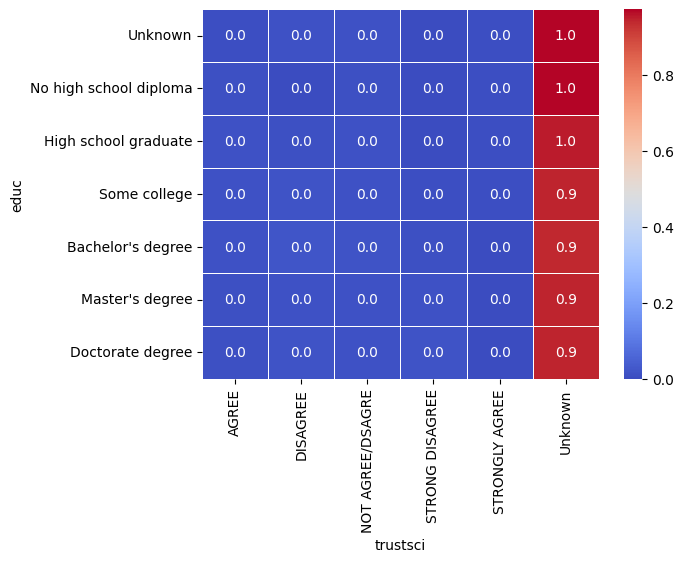

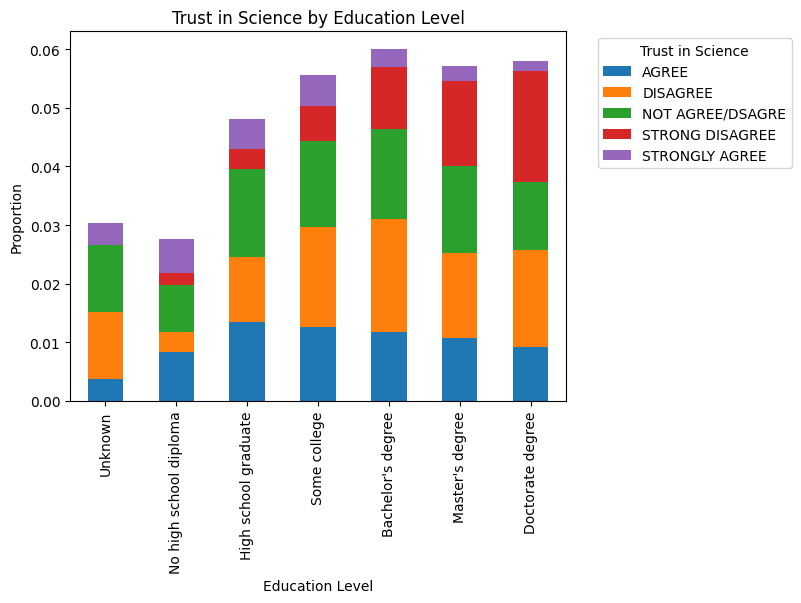

In [50]:
#edu vs trust in science
cross_tab2 = pd.crosstab(df['educ'], df['trustsci'], normalize='index')
edu_order = ['Unknown','No high school diploma','High school graduate','Some college','Bachelor\'s degree','Master\'s degree','Doctorate degree']
cross_tab2 = cross_tab2.reindex(edu_order)
sns.heatmap(cross_tab2, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
if 'Unknown' in cross_tab2.columns: #remove unknowns from columns b/c was making graph disproportionate
  cross_tab2 = cross_tab2.drop(columns=['Unknown'])
cross_tab2.plot(kind='bar', stacked=True)
plt.title("Trust in Science by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Proportion")
plt.legend(title="Trust in Science", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

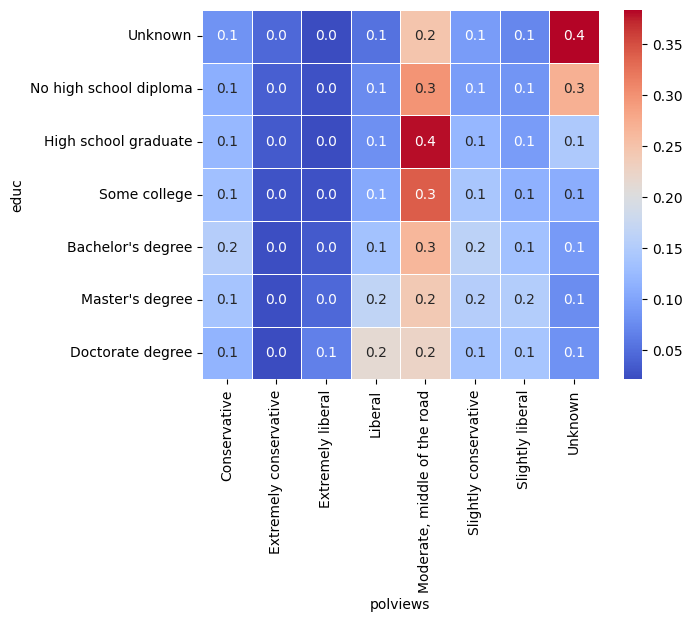

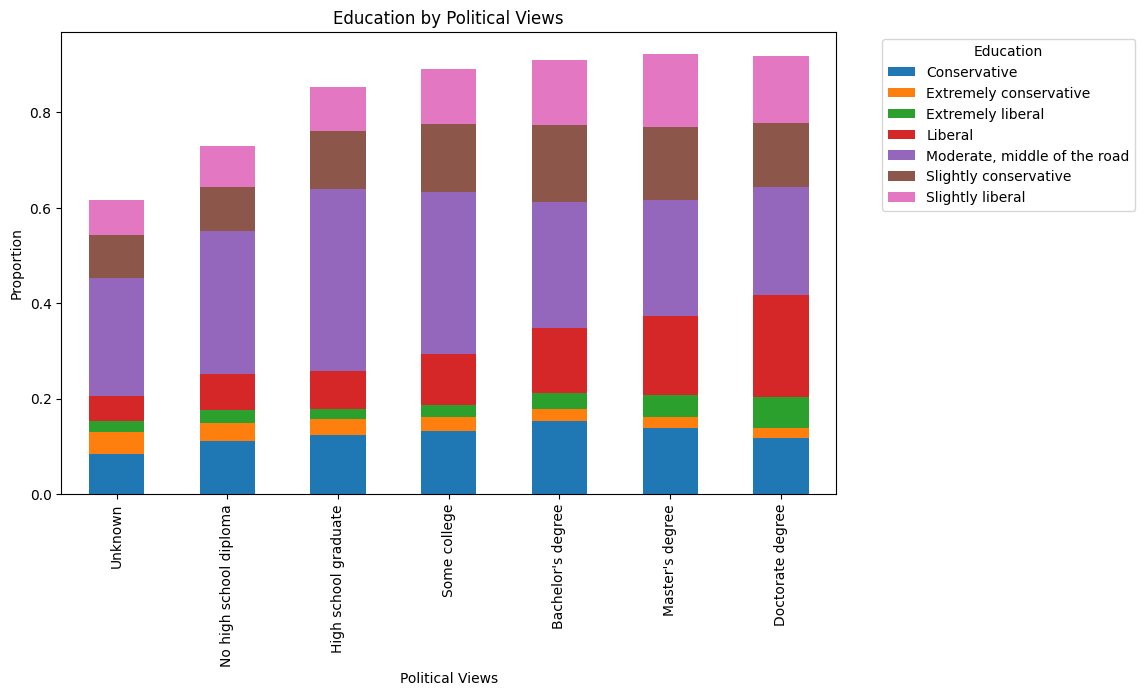

In [53]:
#educ vs polviews
cross_tab3 = pd.crosstab(df['educ'], df['polviews'], normalize='index')
edu_order = ['Unknown','No high school diploma','High school graduate','Some college','Bachelor\'s degree','Master\'s degree','Doctorate degree']
cross_tab3 = cross_tab3.reindex(edu_order)
sns.heatmap(cross_tab3, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
if 'Unknown' in cross_tab3.columns: #remove unknowns from columns b/c was making graph disproportionate
  cross_tab3 = cross_tab3.drop(columns=['Unknown'])
cross_tab3.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Education by Political Views")
plt.xlabel("Political Views")
plt.ylabel("Proportion")
plt.legend(title="Education", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()